In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show torch

Name: torch
Version: 2.4.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: D:\Anaconda\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: torchaudio, torchvision
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch

In [7]:
print("PyTorch Version : {}".format(torch.__version__))

PyTorch Version : 2.4.1+cpu


In [9]:
import torchvision

print("TorchVision Version : {}".format(torchvision.__version__))

TorchVision Version : 0.19.1+cpu


In [11]:
from PIL import Image

In [13]:
img = Image.open("kids.jpg")

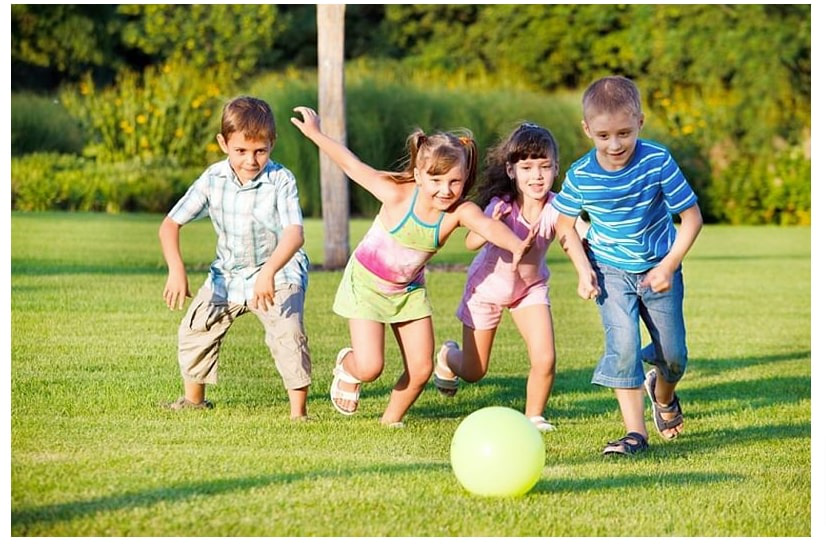

In [15]:
img

In [17]:
holiday = Image.open("holiday.jpg")

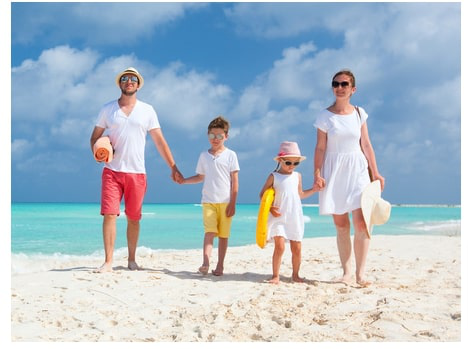

In [19]:
holiday

## Loading the model

In [22]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

In [24]:
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
object_detection_model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
object_detection_model.eval(); ## Setting Model for Evaluation/Prediction

In [26]:
categories = weights.meta["categories"]

In [28]:
print(categories)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


## Making predictions

In [31]:
img_proc = weights.transforms()

In [33]:
kids_proc = img_proc(img)
kids_proc.shape

torch.Size([3, 546, 826])

In [35]:
predictions = object_detection_model(kids_proc.unsqueeze(0))
predictions = predictions[0]
predictions

{'boxes': tensor([[554.1885,  78.0210, 703.1277, 456.2050],
         [155.6968, 100.4423, 313.4085, 422.1846],
         [289.9802, 102.2657, 546.1638, 426.4994],
         [436.0603, 124.4049, 579.9016, 432.9449],
         [449.2357, 406.1236, 546.5706, 499.3233]], grad_fn=<StackBackward0>),
 'labels': tensor([ 1,  1,  1,  1, 37]),
 'scores': tensor([0.9999, 0.9998, 0.9993, 0.9984, 0.9973], grad_fn=<IndexBackward0>)}

In [37]:
predictions["labels"] = [categories[label] for label in predictions["labels"]]

predictions

{'boxes': tensor([[554.1885,  78.0210, 703.1277, 456.2050],
         [155.6968, 100.4423, 313.4085, 422.1846],
         [289.9802, 102.2657, 546.1638, 426.4994],
         [436.0603, 124.4049, 579.9016, 432.9449],
         [449.2357, 406.1236, 546.5706, 499.3233]], grad_fn=<StackBackward0>),
 'labels': ['person', 'person', 'person', 'person', 'sports ball'],
 'scores': tensor([0.9999, 0.9998, 0.9993, 0.9984, 0.9973], grad_fn=<IndexBackward0>)}

## Visualize Results

In [40]:
from torchvision.utils import draw_bounding_boxes
from torchvision.io.image import read_image

In [42]:
kids = read_image("kids.jpg")

kids_with_bboxes = draw_bounding_boxes(kids, boxes=predictions["boxes"], labels=predictions["labels"],
                                       colors="red", width=4)

kids_with_bboxes.shape

torch.Size([3, 546, 826])

In [44]:
kids_with_bboxes_np = kids_with_bboxes.detach().numpy()

kids_with_bboxes_np  = kids_with_bboxes_np.transpose(1,2,0)

TypeError: unhashable type: 'list'

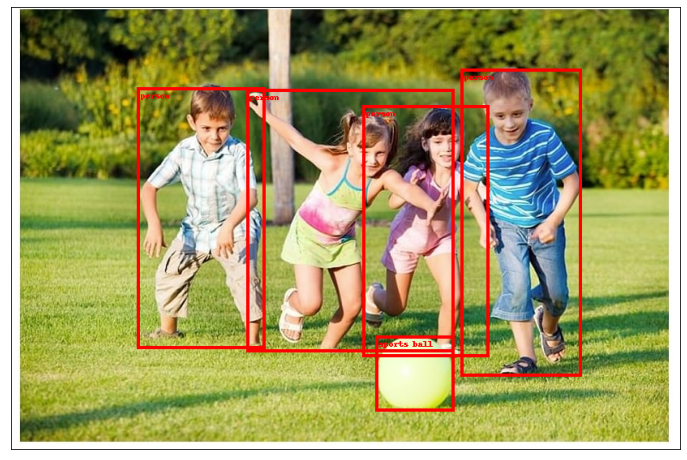

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

plt.imshow(kids_with_bboxes_np);
plt.xticks([],[]);
plt.yticks([],[]);
ax.spines[["top", "left", "right", "bottom"]].set_visible(False)